**Megan Rochella - 0706022210028**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Import necessary libraries for data processing to modelling

## Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/Bank.csv', delimiter=';')
# Import dataset with a ';' delimiter

df.sample(10)
# Shows random 10 rows of the data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3657,56,admin.,divorced,secondary,no,3337,yes,no,telephone,17,nov,99,3,-1,0,unknown,no
2509,41,blue-collar,married,primary,no,0,yes,no,unknown,30,may,232,3,-1,0,unknown,no
365,23,student,single,secondary,no,780,no,no,cellular,16,sep,267,1,-1,0,unknown,no
1179,37,management,married,tertiary,no,5106,no,no,cellular,30,apr,244,1,-1,0,unknown,yes
703,48,blue-collar,married,secondary,no,705,no,no,unknown,13,may,108,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
3057,29,technician,married,tertiary,no,43,yes,no,unknown,20,may,68,2,-1,0,unknown,no
3910,49,admin.,married,secondary,no,14440,yes,no,cellular,21,nov,60,1,-1,0,unknown,no
4390,40,blue-collar,married,secondary,no,4795,yes,no,cellular,17,apr,57,1,-1,0,unknown,no
2874,29,blue-collar,single,secondary,no,555,yes,no,cellular,15,may,133,4,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [3]:
df.info()

# As we can see from the info, the total of the data are 4521, total of columns are 17, and no missing values
# Data types are int and object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
description = df.describe()

description
# The code calculates the count of non-null entries, the mean (average) values, standard deviation (showing how spread out the data is) and the minimum, maximum, and quartiles (25%, 50%, 75%)
# The balance is the entity with the highest range (based on the standard deviation and highest maximum value) while previous has the smallest range between them all

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
print(df['y'].value_counts(dropna=False))
# Unique values count for categorical column in this case target column "y"
# The dataset has more outcomes of B which is almost 8x the M value

y
no     4000
yes     521
Name: count, dtype: int64


In [6]:
df.isnull().sum()
# Checks whether there is still a null value in each column which there are none (0)

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:
for column in df.columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    print(f"Unknown count in '{column}': {unknown_count}")
# Checks how many values of 'unknown'
# There are some unknown values in the dataset, but in the chosen X we don't use them (except job), so it is unnecessary to fill/drop the values with 'unknown'

Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0


In [8]:
df['job'] = df['job'].replace('admin.', 'management')
# Replaces unidentified values 'unknown' in job

df.sample(10)
# Shows random 10 rows of the data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1590,54,blue-collar,married,unknown,no,191,no,no,cellular,4,aug,753,2,-1,0,unknown,no
3538,30,unemployed,single,tertiary,no,302,no,no,cellular,11,feb,528,3,-1,0,unknown,yes
3873,50,management,married,unknown,no,3304,no,no,unknown,5,jun,1009,2,-1,0,unknown,no
2208,28,blue-collar,married,secondary,no,1325,yes,no,cellular,15,may,242,1,-1,0,unknown,no
589,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,unknown,no
2433,73,retired,married,primary,no,796,no,no,cellular,23,oct,427,1,182,2,failure,yes
2762,42,management,married,tertiary,no,520,no,no,cellular,4,nov,158,1,-1,0,unknown,no
3037,52,technician,married,secondary,no,11,yes,no,unknown,13,may,420,1,-1,0,unknown,no
3929,54,housemaid,married,unknown,no,0,no,no,cellular,14,apr,94,5,145,3,other,no
3134,47,self-employed,divorced,secondary,no,8515,yes,no,unknown,20,nov,14,7,112,4,other,no


## Data Visualization

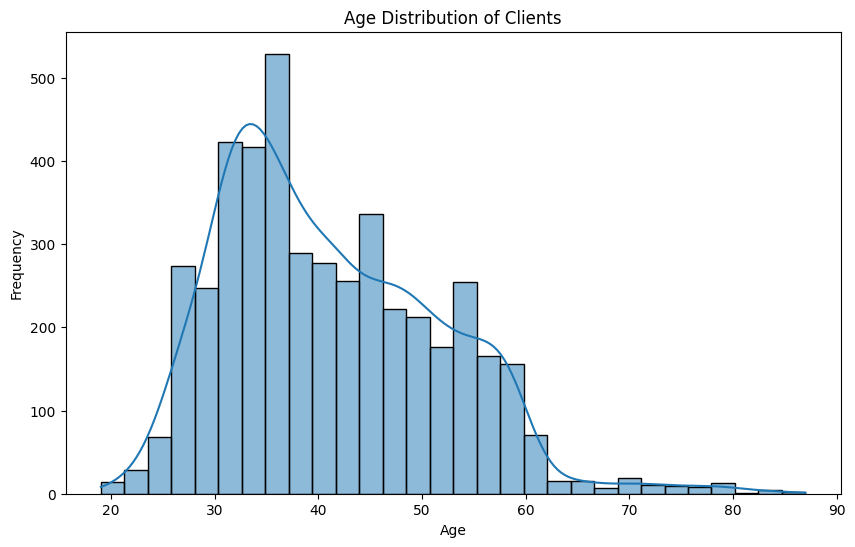

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()
# Visualize the distribution of ages in the dataset to understand the age demographics of the clients
# We can see the highest range are 30-40 year olds

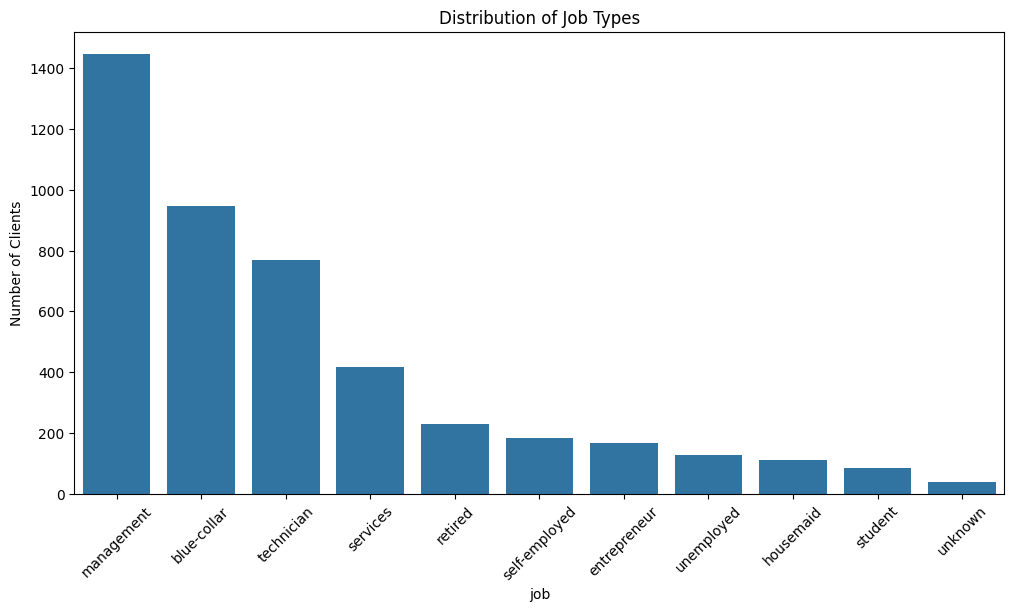

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xticks(rotation=45)
plt.ylabel('Number of Clients')

plt.show()
# Show the count of clients by job type to see which job categories are most represented
# We can see that management has the highest number of clients

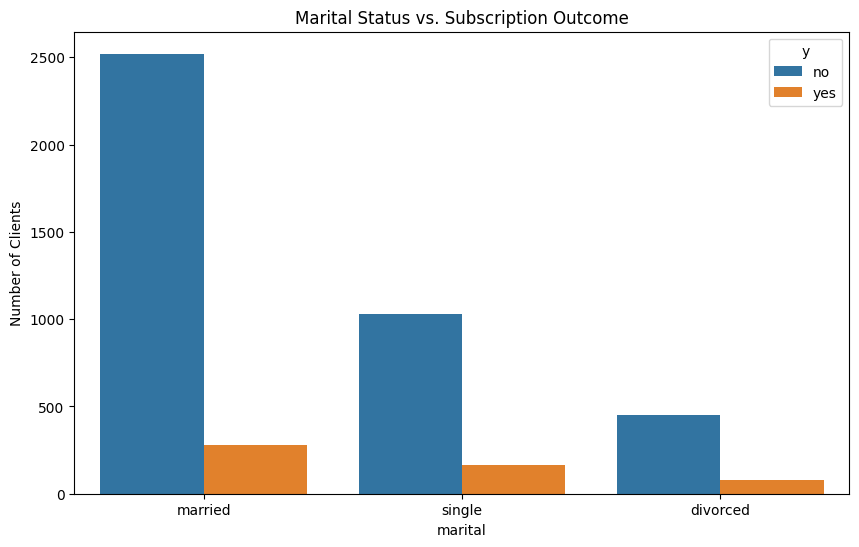

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital', hue='y')
plt.title('Marital Status vs. Subscription Outcome')
plt.ylabel('Number of Clients')

plt.show()
# Visualize the relationship between marital status and the outcome of the marketing campaign (i.e., whether they subscribed or not)
# We can see that 'married' status has the highest number of clients that the subscription outcome is 'yes'

In [12]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))
# Encodes the data to from categorical values into 'int'

df.sample(5)
# Shows random 10 rows of the data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2501,59,4,1,1,0,9976,1,0,2,29,8,57,2,-1,0,3,0
4080,40,0,1,0,0,2805,1,0,0,14,8,173,6,353,23,0,0
4518,57,8,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
3028,34,3,1,1,0,79,1,0,2,23,8,83,1,-1,0,3,0
117,22,3,2,1,0,4111,0,1,0,19,1,65,1,-1,0,3,0


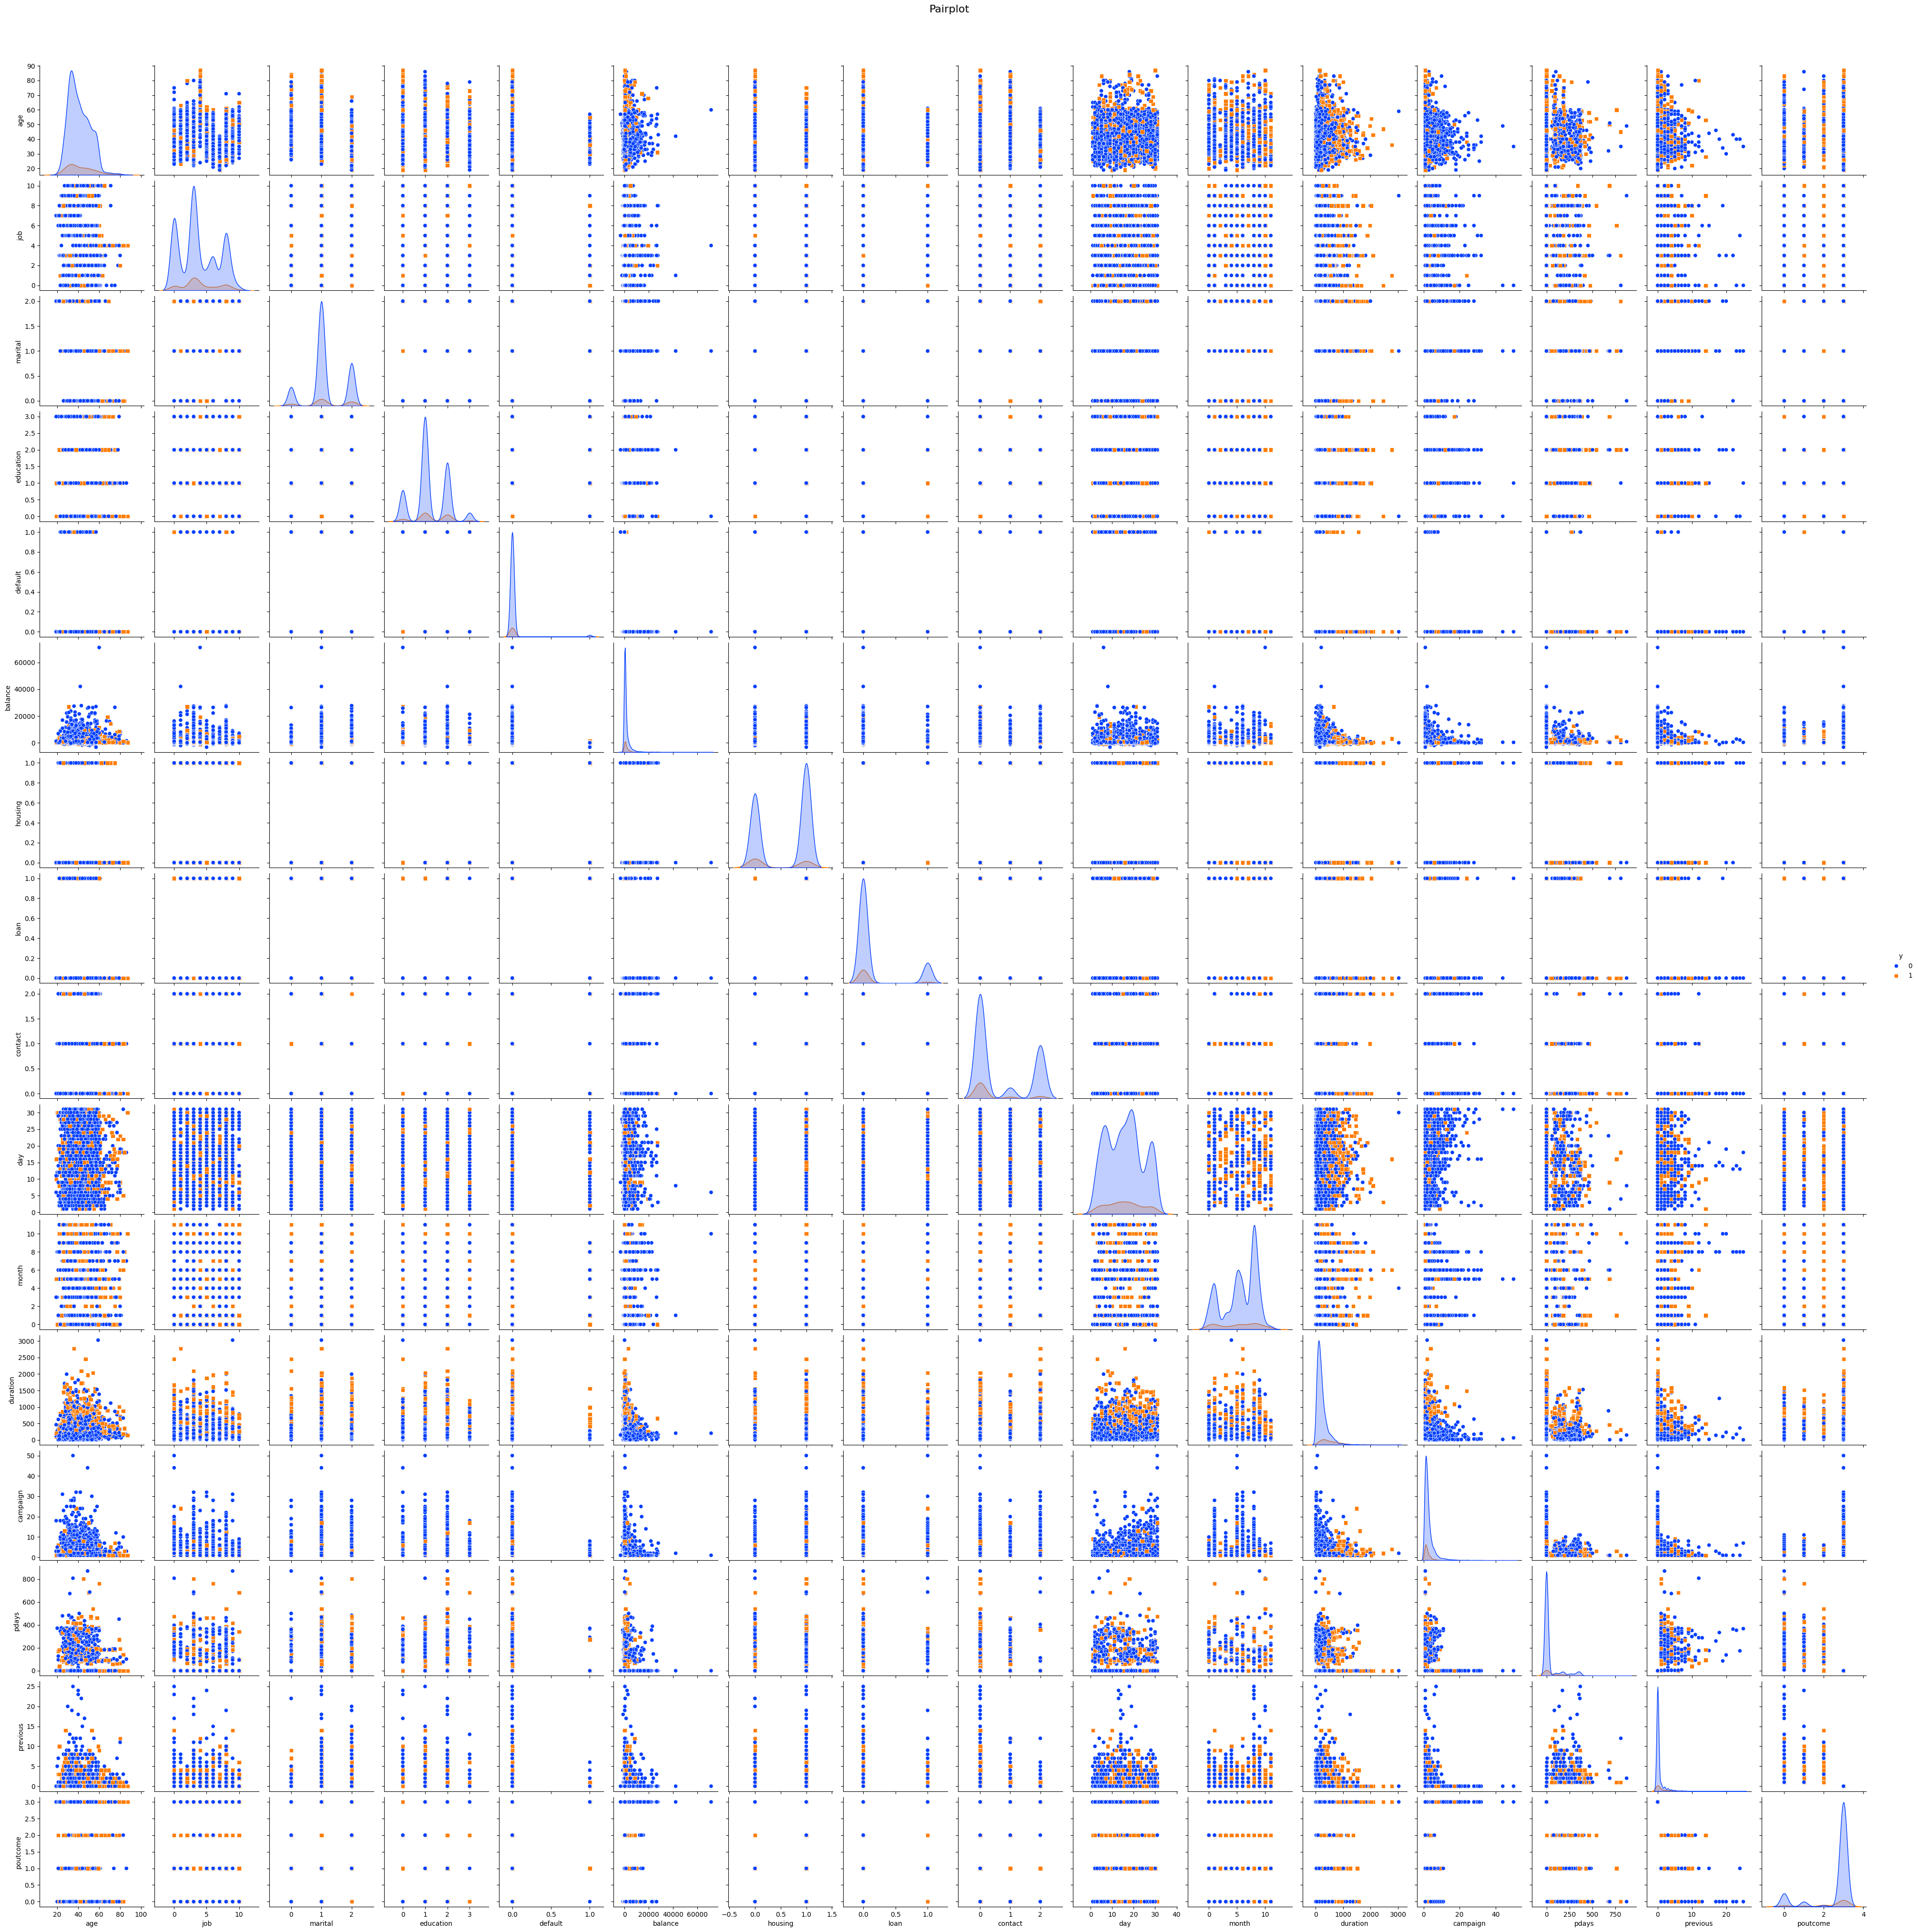

In [13]:
sns.pairplot(df, hue='y', palette='bright', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pairplot', y=1.02, fontsize=16)

plt.show()
# The markers differentiate the 'y' value (0 being no and 1 being yes)
# In the duration pairplots orange dots tend to be in the higher levels of the duration
# Many of the variables does not affect the 'y' target significantly

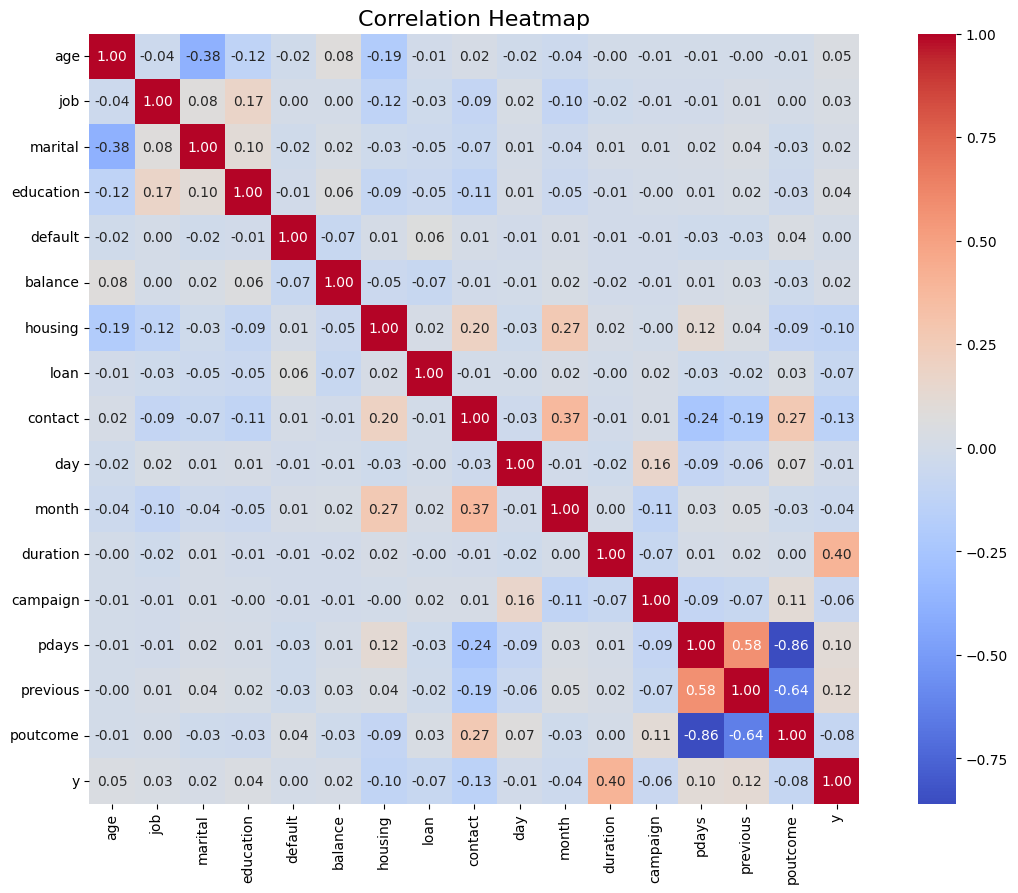

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)

plt.show()
# The correlation heatmap shows the correlation of each attributes to the target variable ('y')
# The most related attribute is the duration (last contact duration, in seconds) where some attributes are not very relevant

## Machine Learning (Split Data)

In [15]:
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis = 1)
# This line creates a new DataFrame X by removing the unnecessary columns from the original DataFrame

y = df['y'] # This column typically represents the target variable or label that the model will learn to predict based

In [16]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
# Use SMOTEEN (to make the data more balanced)

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())
# SMOTEEN combines SMOTE with an undersampling technique called Edited Nearest Neighbors (ENN)
# After SMOTE adds synthetic samples to the minority class
# ENN then removes samples from the majority class that are likely to be misclassified (borderline or noisy points) based on their nearest neighbors

Class distribution after SMOTEEN:
y
0    2941
1    2266
Name: count, dtype: int64


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# It splits the feature set X and the target variable y into training and testing subsets
# The 20% of the data will be used for testing, while 80% will be used for training

X_train.shape, X_test.shape
# 'shape' method is used to check how many rows and columns are associated with each train or test data
# X_train has 4165 rows/data and 3 columns for training data
# X_test has 1042 rows/data and 3 columns for testing data

((4165, 3), (1042, 3))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
# Modelling and fitting using random forest classifier with estimators = 100

RandomForestClassifier(random_state=42)

In [19]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')
# Shows the accuracy score based on the y_test and y_pred
# Resulting with an almost perfect 99% accuracy

Accuracy: 0.9942418426103646


In [20]:
y_train_rf = rf_classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))
# The margin is less than 1%, so we conclude that the model is well-fitted

Testing accuracy: 0.9942
Training accuracy: 1.0000


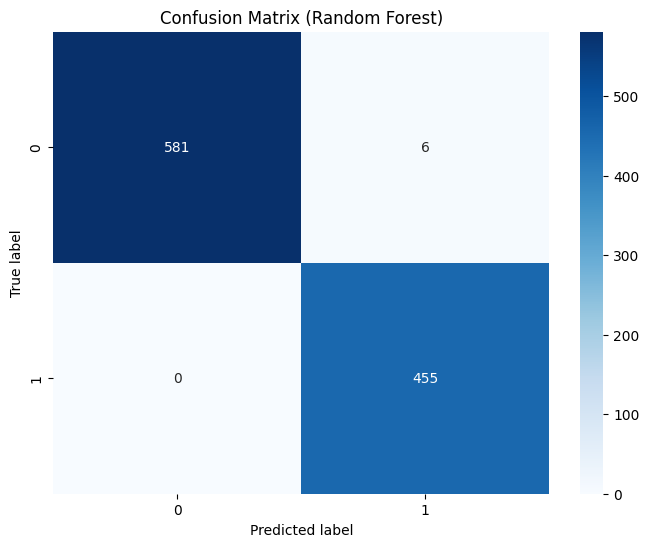

In [21]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of random forest results in 1036 right predcitions out of 1042 datas

In [22]:
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)
# Classification report of the random forest
# It shows the precision, recall, f1-score, and support values of the model

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       587
           1       0.99      1.00      0.99       455

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042



## Conclusions from the Classification Report (Random Forest)

**The Random Forest model demonstrates excellent performance with an overall accuracy of 99%. This indicates that the model correctly classifies 99% of the instances in the dataset.**

Class-wise Metrics:
* Class 0:
Precision: 1.00 (100% of predicted class 0 instances are correct),
Recall: 0.99 (99% of actual class 0 instances are correctly identified),
F1-Score: 0.99 (harmonic mean of precision and recall, indicating a strong balance)
* Class 1:
Precision: 0.99 (99% of predicted class 1 instances are correct),
Recall: 1.00 (100% of actual class 1 instances are correctly identified),
F1-Score: 0.99 (indicating a strong balance as well)

**The Random Forest model is highly effective for this classification task, achieving near-perfect precision, recall, and F1-scores across both classes. The model is well-suited for deployment in scenarios where accurate classification is critical.**

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)
# Modelling and fitting using gradient boosting classifier with random state = 42

GradientBoostingClassifier(random_state=42)

In [24]:
y_pred_gb = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gb)

print(f'Accuracy: {accuracy}')
# Shows the accuracy score based on the y_test and y_pred
# Resulting with a high 97% accuracy

Accuracy: 0.9788867562380038


In [25]:
y_train_gb = gb_model.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gb)
training_accuracy = accuracy_score(y_train, y_train_gb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))
# The margin is less than 1%, so we conclude that the model is well-fitted

Testing accuracy: 0.9789
Training accuracy: 0.9815


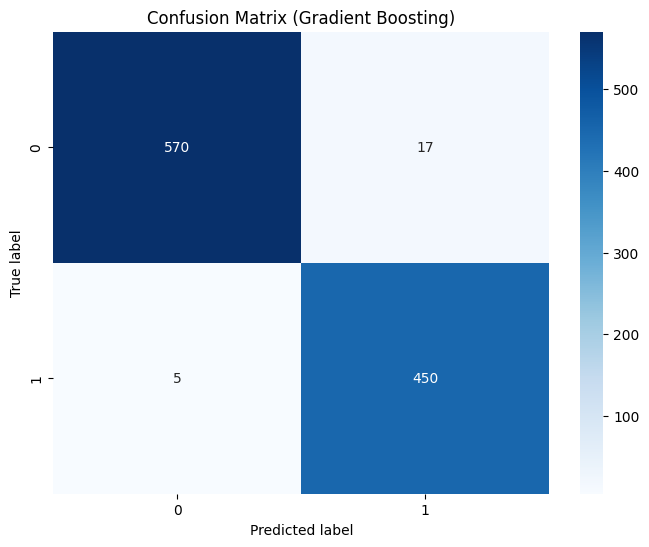

In [26]:
cm_xg = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8,6))
sns.heatmap(cm_xg, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of gradient boosting results in 1020 right predcitions out of 1042 datas

In [27]:
class_report_xg = classification_report(y_test, y_pred_gb)

print("Classification Report Gradient Boosting: \n", class_report_xg)
# Classification report of the gradient boosting
# It shows the precision, recall, f1-score, and support values of the model

Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       587
           1       0.96      0.99      0.98       455

    accuracy                           0.98      1042
   macro avg       0.98      0.98      0.98      1042
weighted avg       0.98      0.98      0.98      1042



## Conclusions from the Classification Report (Gradient Boosting)

**The Gradient Boosting model achieves an accuracy of 98%, indicating that it correctly classifies 98% of the instances in the dataset.**

Class-wise Metrics:
* Class 0:
Precision: 0.99 (99% of predicted class 0 instances are correct),
Recall: 0.97 (97% of actual class 0 instances are correctly identified),
F1-Score: 0.98 (harmonic mean of precision and recall, indicating strong performance)
* Class 1:
Precision: 0.96 (96% of predicted class 1 instances are correct),
Recall: 0.99 (99% of actual class 1 instances are correctly identified),
F1-Score: 0.98 (indicating a strong balance between precision and recall)

**The Gradient Boosting model performs very well, with high precision, recall, and F1-scores for both classes. Although it slightly underperforms compared to the Random Forest model in terms of precision for class 1, its overall effectiveness remains strong.**

## Final Conclusion

**Using SMOTEEN effectively mitigates the issues associated with class imbalance by providing a more balanced dataset for training.**

**Using three carefully selected variables ('duration', 'pdays', 'previous') can significantly enhance model accuracy by ensuring that the model focuses on the most relevant information, reducing complexity, and improving interpretability.**

## Recommendations:
* Choose Random Forest if the goal is to prioritize accuracy and precision, especially where false positives and false negatives have significant consequences.
* Choose Gradient Boosting if the goal is to make a model that can potentially generalize better (or faster training time with good performance.)

**In summary, both models are strong contenders, but the Random Forest model has a slight edge in terms of performance metrics.**